In [1]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
# heavy dataset
data0 = pd.read_csv('/Users/farisavdagic/Downloads/searches.csv.bz2', compression = 'bz2', warn_bad_lines=False, error_bad_lines=False)

In [113]:
# Data importation
data_test = pd.read_csv('/Users/farisavdagic/Downloads/bookings_test.csv', sep='^')
data_set = data_test.rename(columns=lambda x: x.strip())
data_test_searches = pd.read_csv('/Users/farisavdagic/Downloads/searches_test.csv', sep='^')
#data_test_searches['InternetOffice']

In [110]:
# First exercise
print 'nb lines bookings dataset : ', data_set.shape[0]
print 'nb lines searches dataset : ', data_test_searches.shape[0]

nb lines bookings dataset :  99
nb lines searches dataset :  1499999


In [78]:
# Second exercise
data_set_pos = data_set[(data_set.pax > 0) & (data_set.year == 2013)]
groupby_arr_port = data_set_pos[['arr_port','pax']].groupby('arr_port').sum().sort('pax', ascending=False)
print groupby_arr_port.head(10)

          pax
arr_port     
SIN        12
HAV        12
YWG        10
MNL         6
AYT         6
BWI         6
LIS         6
PVG         6
DMM         6
ZRH         4


Destination   
AGP          1     48
BCN          1    162
MAD          1    125
dtype: int64

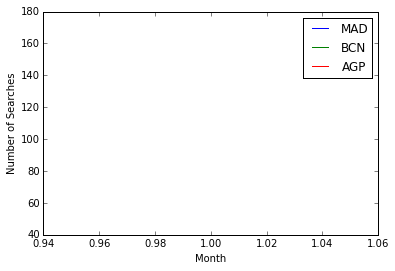

In [117]:
# Third exercise
destination_interested = ['MAD', 'BCN', 'AGP']
data_test_searches_reducted = data_test_searches[data_test_searches['Destination'].isin(destination_interested)]
groupby_destination = data_test_searches_reducted[['Date', 'Destination']].groupby(['Destination',pd.DatetimeIndex(data_test_searches_reducted.Date).month]).size()
plt.figure()
for dest in destination_interested:
    plt.plot(groupby_destination[dest].index.tolist(), groupby_destination[dest],label=dest )
plt.legend()
plt.xlabel('Month')
plt.ylabel('Number of Searches')

In [115]:
data_test_searches_reducted.Date.unique()

array(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
       '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
       '2013-01-09', '2013-01-10'], dtype=object)

In [91]:
# Bonus exercise 2
from collections import defaultdict
import json
def wrap_output(groupby, n):
    groupby = groupby.head(n)
    results = defaultdict(lambda: defaultdict(dict))
    for key, value in groupby.itertuples():
        results[key] = value  
    return json.dumps(results)

# test function 
print wrap_output(groupby_arr_port, 10)

{"YWG     ": 10, "DMM     ": 6, "AYT     ": 6, "BWI     ": 6, "PVG     ": 6, "HAV     ": 12, "SIN     ": 12, "LIS     ": 6, "ZRH     ": 4, "MNL     ": 6}
